## 03_05: Make movies with Matplotlib

* Matplotlib: https://matplotlib.org

In [1]:
import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

import PIL
import PIL.Image

import bs4

In [2]:
frame = PIL.Image.open('frames/20120606_000013_512_0171.jpg', 'r')

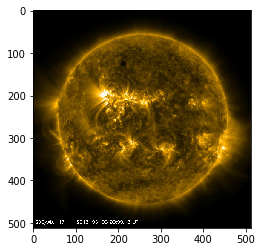

In [3]:
pp.imshow(frame)

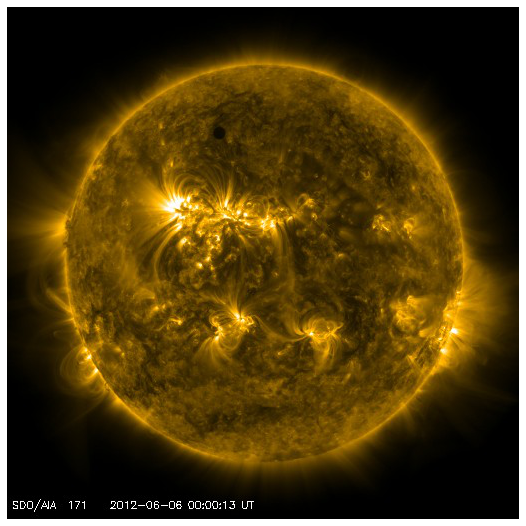

In [4]:
figure = pp.figure(figsize=(512/72, 512/72), dpi=72)

axes = pp.Axes(figure, [0., 0., 1., 1.])
axes.set_axis_off()
figure.add_axes(axes)

pp.imshow(frame)

In [5]:
soup = bs4.BeautifulSoup(open('cached/index_20120606.html','r'), 'lxml')

In [6]:
imgs = [link.string for link in soup.pre.find_all('a') if link.string.endswith('512_0171.jpg')]

In [7]:
ffmpeg = anim.writers['ffmpeg']

writer = ffmpeg(fps=5, bitrate=1000)

In [8]:
figure = pp.figure(figsize=(512/72, 512/72), dpi=72)

axes = pp.Axes(figure, [0., 0., 1., 1.])
axes.set_axis_off()
figure.add_axes(axes)

with writer.saving(figure, 'sun.mp4', 72):
    for img in imgs:
        frame = PIL.Image.open(f'frames/{img}')
        pp.imshow(frame)
        writer.grab_frame()

pp.close() # avoid displaying the last frame below this cell

In [ ]:
# on OS X:    !open sun.mp4
# on Windows: !start sun.mp4
# on Linux:   !xdg-open sun.mp4

<video src='sun.mp4' controls></video>